In [17]:
import requests
import pandas as pd
import time

client_id = "_1Rz699mC_WtItnyD4HVWw"
client_secret = "Tgi0JdTZF_D0hgqvspSEc3pUivceeQ"
user_agent = "DataFetcher/1.0 by GoodSpeed4432"
auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
data = {
    'grant_type': 'password',
    'username': 'GoodSpeed4432',
    'password': 'Lolazz15000@'
}
headers = {'User-Agent': user_agent}
res = requests.post("https://www.reddit.com/api/v1/access_token", auth=auth, data=data, headers=headers)

if res.status_code == 200:
    token = res.json()["access_token"]
    headers["Authorization"] = f"bearer {token}"
    print("Access token obtained successfully.")
else:
    print(f"Failed to get access token: {res.status_code} {res.json()}")
    exit()

subreddit = "Kazakhstan"  
url = f"https://oauth.reddit.com/r/{subreddit}/top.json"
all_posts = []

params = {
    'limit': 100,  
    't': 'all'  
}
after = None

for _ in range(10):  
    if after:
        params['after'] = after  
    
    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        posts_data = response.json()["data"]["children"]
        for post in posts_data:
            post_info = post["data"]
            post_data = {
                "Title": post_info.get("title"),
                "Upvotes": post_info.get("ups"),
                "Number of Comments": post_info.get("num_comments"),
                "Post Date": post_info.get("created_utc"),
                "Author Name": post_info.get("author"),
                "Post ID": post_info.get("id"),
                "Score": post_info.get("score"),
                "Upvote Ratio": post_info.get("upvote_ratio"),
                "Over 18?": post_info.get("over_18"),
                "Post Hint": post_info.get("post_hint"),  
                "Is Video": post_info.get("is_video"),  
                "Text": post_info.get("selftext"),
            }
            all_posts.append(post_data)

        after = response.json()["data"].get("after", None)
        print(f"Fetched {len(posts_data)} posts...")

        if not after:  
            break
    else:
        print(f"Failed to fetch posts: {response.status_code} {response.json()}")
        break

    time.sleep(2)  

df = pd.DataFrame(all_posts)
df.to_csv("posts_Kz.csv", index=False)


Access token obtained successfully.
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Fetched 100 posts...
Data saved to reddit_posts_all_time.csv


In [75]:
import pandas as pd
import numpy as np
df = pd.read_csv('posts_Kz.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Upvotes             1000 non-null   int64  
 2   Number of Comments  1000 non-null   int64  
 3   Post Date           1000 non-null   float64
 4   Author Name         1000 non-null   object 
 5   Post ID             1000 non-null   object 
 6   Score               1000 non-null   int64  
 7   Upvote Ratio        1000 non-null   float64
 8   Over 18?            1000 non-null   bool   
 9   Post Hint           766 non-null    object 
 10  Is Video            1000 non-null   bool   
 11  Text                175 non-null    object 
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 80.2+ KB


In [79]:
df.shape

(1000, 12)

In [81]:
df.head()

Title  Upvotes  \
0                     Kazakhstan stands with Ukraine     2260   
1  British parliament is considering imposing san...      947   
2                            True size of Kazakhstan      871   
3                                             Пиздец      780   
4                                      Today. Astana      649   

   Number of Comments     Post Date      Author Name  Post ID  Score  \
0                 225  1.645706e+09  Chief_Nub_Nub99   t0a03j   2260   
1                 194  1.646133e+09          Argy007   t45gz3    947   
2                 116  1.708929e+09  Ilikesnowboards  1b0asx9    871   
3                 320  1.732776e+09          BearHan  1h1ptv7    780   
4                  43  1.652257e+09   AdHaunting8081   un4wt0    649   

   Upvote Ratio  Over 18?     Post Hint  Is Video  \
0          0.97     False         image     False   
1          0.94     False  hosted:video      True   
2          0.99     False         image     False   
3          0.93     False         image     False   
4          0.99     False  hosted:video      True   

                                                Text  
0                                                NaN  
1                                                NaN  
2  Kazakhstan overlaid over a map of Europe. \n\n...  
3                                                NaN  
4                                                NaN

In [83]:
df.tail()

Title  Upvotes  \
995                      Shao Kahn is Kazakh confirmed       66   
996  A 5,000 year old burial made to resemble a cha...       68   
997   And no, I don't refer to Astana as "Nur-Sultan".       66   
998     The giant squirrel in Almaty has a mask on now       70   
999                                     kazakh wedding       65   

     Number of Comments     Post Date          Author Name  Post ID  Score  \
995                   5  1.592664e+09            Ameriggio   hcnfvt     66   
996                   0  1.588888e+09            Tengri_99   gfg29b     68   
997                  24  1.587952e+09  Smoke_Me_When_i_Die   g8r9qc     66   
998                   2  1.584304e+09            Ameriggio   fj7xmy     70   
999                   7  1.731366e+09          helipetunia  1gp5wzu     65   

     Upvote Ratio  Over 18? Post Hint  Is Video  \
995          0.95     False     image     False   
996          0.98     False     image     False   
997          0.91     False     image     False   
998          0.98     False     image     False   
999          0.99     False       NaN     False   

                                                  Text  
995                                                NaN  
996                                                NaN  
997                                                NaN  
998                                                NaN  
999  I made a post about a week ago and basically, ...

In [85]:
df.isnull().sum()

Title                   0
Upvotes                 0
Number of Comments      0
Post Date               0
Author Name             0
Post ID                 0
Score                   0
Upvote Ratio            0
Over 18?                0
Post Hint             234
Is Video                0
Text                  825
dtype: int64

In [87]:
df.duplicated().sum()

0

In [89]:
df.describe()

Upvotes  Number of Comments     Post Date        Score  \
count  1000.000000          1000.00000  1.000000e+03  1000.000000   
mean    134.419000            32.17000  1.668369e+09   134.419000   
std     114.950037            44.07114  4.554786e+07   114.950037   
min      63.000000             0.00000  1.553017e+09    63.000000   
25%      80.000000             9.00000  1.641561e+09    80.000000   
50%     102.000000            17.00000  1.663921e+09   102.000000   
75%     143.250000            37.00000  1.714951e+09   143.250000   
max    2260.000000           417.00000  1.734524e+09  2260.000000   

       Upvote Ratio  
count    1000.00000  
mean        0.95166  
std         0.04946  
min         0.67000  
25%         0.94000  
50%         0.97000  
75%         0.99000  
max         1.00000

In [91]:
statistics = {
    'Upvotes': {
        'Variance': df['Upvotes'].var(),
        'Median': df['Upvotes'].median(),
        'Mode': df['Upvotes'].mode()[0]
    },
    'Number of Comments': {
        'Variance': df['Number of Comments'].var(),
        'Median': df['Number of Comments'].median(),
        'Mode': df['Number of Comments'].mode()[0]
    },
    'Score': {
        'Variance': df['Score'].var(),
        'Median': df['Score'].median(),
        'Mode': df['Score'].mode()[0]
    },
    'Upvote Ratio': {
        'Variance': df['Upvote Ratio'].var(),
        'Median': df['Upvote Ratio'].median(),
        'Mode': df['Upvote Ratio'].mode()[0]
    }
}

result_df = pd.DataFrame(statistics)
result_df

Upvotes  Number of Comments        Score  Upvote Ratio
Variance  13213.51095         1942.265365  13213.51095      0.002446
Median      102.00000           17.000000    102.00000      0.970000
Mode         70.00000            4.000000     70.00000      0.990000

In [93]:
Q1_upvotes = df['Upvotes'].quantile(0.25)
Q3_upvotes = df['Upvotes'].quantile(0.75)
IQR_upvotes = Q3_upvotes - Q1_upvotes

outliers_upvotes = df[(df['Upvotes'] < (Q1_upvotes - 1.5 * IQR_upvotes)) | 
                      (df['Upvotes'] > (Q3_upvotes + 1.5 * IQR_upvotes))]

outliers_upvotes.head()

Title  Upvotes  \
0                     Kazakhstan stands with Ukraine     2260   
1  British parliament is considering imposing san...      947   
2                            True size of Kazakhstan      871   
3                                             Пиздец      780   
4                                      Today. Astana      649   

   Number of Comments     Post Date      Author Name  Post ID  Score  \
0                 225  1.645706e+09  Chief_Nub_Nub99   t0a03j   2260   
1                 194  1.646133e+09          Argy007   t45gz3    947   
2                 116  1.708929e+09  Ilikesnowboards  1b0asx9    871   
3                 320  1.732776e+09          BearHan  1h1ptv7    780   
4                  43  1.652257e+09   AdHaunting8081   un4wt0    649   

   Upvote Ratio  Over 18?     Post Hint  Is Video  \
0          0.97     False         image     False   
1          0.94     False  hosted:video      True   
2          0.99     False         image     False   
3          0.93     False         image     False   
4          0.99     False  hosted:video      True   

                                                Text  
0                                                NaN  
1                                                NaN  
2  Kazakhstan overlaid over a map of Europe. \n\n...  
3                                                NaN  
4                                                NaN

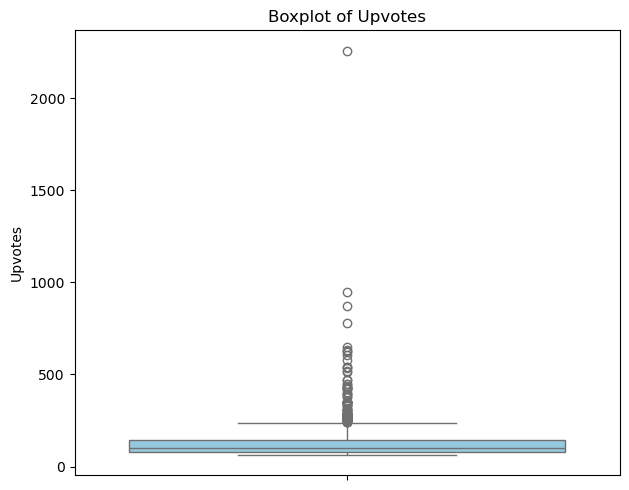

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Upvotes'], color="skyblue")
plt.title('Boxplot of Upvotes')
plt.tight_layout()
plt.show()


In [97]:
#for comments
Q1_comments = df['Number of Comments'].quantile(0.25)
Q3_comments = df['Number of Comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

outliers_comments = df[(df['Number of Comments'] < (Q1_comments - 1.5 * IQR_comments)) | 
                       (df['Number of Comments'] > (Q3_comments + 1.5 * IQR_comments))]
outliers_comments.head()

Title  Upvotes  \
0                     Kazakhstan stands with Ukraine     2260   
1  British parliament is considering imposing san...      947   
2                            True size of Kazakhstan      871   
3                                             Пиздец      780   
6                                 Should we do this?      629   

   Number of Comments     Post Date      Author Name  Post ID  Score  \
0                 225  1.645706e+09  Chief_Nub_Nub99   t0a03j   2260   
1                 194  1.646133e+09          Argy007   t45gz3    947   
2                 116  1.708929e+09  Ilikesnowboards  1b0asx9    871   
3                 320  1.732776e+09          BearHan  1h1ptv7    780   
6                  97  1.705907e+09        [deleted]  19cpqoz    629   

   Upvote Ratio  Over 18?     Post Hint  Is Video  \
0          0.97     False         image     False   
1          0.94     False  hosted:video      True   
2          0.99     False         image     False   
3          0.93     False         image     False   
6          0.94     False         image     False   

                                                Text  
0                                                NaN  
1                                                NaN  
2  Kazakhstan overlaid over a map of Europe. \n\n...  
3                                                NaN  
6                                                NaN

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Number of Comments'], color="lightgreen")
plt.title('Boxplot of Number of Comments')
plt.tight_layout()
plt.show()


In [101]:
df.isnull().sum()

Title                   0
Upvotes                 0
Number of Comments      0
Post Date               0
Author Name             0
Post ID                 0
Score                   0
Upvote Ratio            0
Over 18?                0
Post Hint             234
Is Video                0
Text                  825
dtype: int64

In [103]:
df = df.rename(columns={'Post Hint': 'Post Type'})

In [105]:
df = df.drop('Text',axis = 1)
df

Title  Upvotes  \
0                       Kazakhstan stands with Ukraine     2260   
1    British parliament is considering imposing san...      947   
2                              True size of Kazakhstan      871   
3                                               Пиздец      780   
4                                        Today. Astana      649   
..                                                 ...      ...   
995                      Shao Kahn is Kazakh confirmed       66   
996  A 5,000 year old burial made to resemble a cha...       68   
997   And no, I don't refer to Astana as "Nur-Sultan".       66   
998     The giant squirrel in Almaty has a mask on now       70   
999                                     kazakh wedding       65   

     Number of Comments     Post Date          Author Name  Post ID  Score  \
0                   225  1.645706e+09      Chief_Nub_Nub99   t0a03j   2260   
1                   194  1.646133e+09              Argy007   t45gz3    947   
2                   116  1.708929e+09      Ilikesnowboards  1b0asx9    871   
3                   320  1.732776e+09              BearHan  1h1ptv7    780   
4                    43  1.652257e+09       AdHaunting8081   un4wt0    649   
..                  ...           ...                  ...      ...    ...   
995                   5  1.592664e+09            Ameriggio   hcnfvt     66   
996                   0  1.588888e+09            Tengri_99   gfg29b     68   
997                  24  1.587952e+09  Smoke_Me_When_i_Die   g8r9qc     66   
998                   2  1.584304e+09            Ameriggio   fj7xmy     70   
999                   7  1.731366e+09          helipetunia  1gp5wzu     65   

     Upvote Ratio  Over 18?     Post Type  Is Video  
0            0.97     False         image     False  
1            0.94     False  hosted:video      True  
2            0.99     False         image     False  
3            0.93     False         image     False  
4            0.99     False  hosted:video      True  
..            ...       ...           ...       ...  
995          0.95     False         image     False  
996          0.98     False         image     False  
997          0.91     False         image     False  
998          0.98     False         image     False  
999          0.99     False           NaN     False  

[1000 rows x 11 columns]

In [107]:
df['Post Type'] = df['Post Type'].fillna('text')
df

Title  Upvotes  \
0                       Kazakhstan stands with Ukraine     2260   
1    British parliament is considering imposing san...      947   
2                              True size of Kazakhstan      871   
3                                               Пиздец      780   
4                                        Today. Astana      649   
..                                                 ...      ...   
995                      Shao Kahn is Kazakh confirmed       66   
996  A 5,000 year old burial made to resemble a cha...       68   
997   And no, I don't refer to Astana as "Nur-Sultan".       66   
998     The giant squirrel in Almaty has a mask on now       70   
999                                     kazakh wedding       65   

     Number of Comments     Post Date          Author Name  Post ID  Score  \
0                   225  1.645706e+09      Chief_Nub_Nub99   t0a03j   2260   
1                   194  1.646133e+09              Argy007   t45gz3    947   
2                   116  1.708929e+09      Ilikesnowboards  1b0asx9    871   
3                   320  1.732776e+09              BearHan  1h1ptv7    780   
4                    43  1.652257e+09       AdHaunting8081   un4wt0    649   
..                  ...           ...                  ...      ...    ...   
995                   5  1.592664e+09            Ameriggio   hcnfvt     66   
996                   0  1.588888e+09            Tengri_99   gfg29b     68   
997                  24  1.587952e+09  Smoke_Me_When_i_Die   g8r9qc     66   
998                   2  1.584304e+09            Ameriggio   fj7xmy     70   
999                   7  1.731366e+09          helipetunia  1gp5wzu     65   

     Upvote Ratio  Over 18?     Post Type  Is Video  
0            0.97     False         image     False  
1            0.94     False  hosted:video      True  
2            0.99     False         image     False  
3            0.93     False         image     False  
4            0.99     False  hosted:video      True  
..            ...       ...           ...       ...  
995          0.95     False         image     False  
996          0.98     False         image     False  
997          0.91     False         image     False  
998          0.98     False         image     False  
999          0.99     False          text     False  

[1000 rows x 11 columns]

In [109]:
df['Post Type'] = df['Post Type'].replace('hosted:video','video')
df['Post Type'] = df['Post Type'].replace('rich:video','video')
df

Title  Upvotes  \
0                       Kazakhstan stands with Ukraine     2260   
1    British parliament is considering imposing san...      947   
2                              True size of Kazakhstan      871   
3                                               Пиздец      780   
4                                        Today. Astana      649   
..                                                 ...      ...   
995                      Shao Kahn is Kazakh confirmed       66   
996  A 5,000 year old burial made to resemble a cha...       68   
997   And no, I don't refer to Astana as "Nur-Sultan".       66   
998     The giant squirrel in Almaty has a mask on now       70   
999                                     kazakh wedding       65   

     Number of Comments     Post Date          Author Name  Post ID  Score  \
0                   225  1.645706e+09      Chief_Nub_Nub99   t0a03j   2260   
1                   194  1.646133e+09              Argy007   t45gz3    947   
2                   116  1.708929e+09      Ilikesnowboards  1b0asx9    871   
3                   320  1.732776e+09              BearHan  1h1ptv7    780   
4                    43  1.652257e+09       AdHaunting8081   un4wt0    649   
..                  ...           ...                  ...      ...    ...   
995                   5  1.592664e+09            Ameriggio   hcnfvt     66   
996                   0  1.588888e+09            Tengri_99   gfg29b     68   
997                  24  1.587952e+09  Smoke_Me_When_i_Die   g8r9qc     66   
998                   2  1.584304e+09            Ameriggio   fj7xmy     70   
999                   7  1.731366e+09          helipetunia  1gp5wzu     65   

     Upvote Ratio  Over 18? Post Type  Is Video  
0            0.97     False     image     False  
1            0.94     False     video      True  
2            0.99     False     image     False  
3            0.93     False     image     False  
4            0.99     False     video      True  
..            ...       ...       ...       ...  
995          0.95     False     image     False  
996          0.98     False     image     False  
997          0.91     False     image     False  
998          0.98     False     image     False  
999          0.99     False      text     False  

[1000 rows x 11 columns]

In [31]:
df = df.drop('Is Video',axis = 1)
df

Title  Upvotes  \
0                       Kazakhstan stands with Ukraine     2260   
1    British parliament is considering imposing san...      947   
2                              True size of Kazakhstan      871   
3                                               Пиздец      780   
4                                        Today. Astana      649   
..                                                 ...      ...   
995                      Shao Kahn is Kazakh confirmed       66   
996  A 5,000 year old burial made to resemble a cha...       68   
997   And no, I don't refer to Astana as "Nur-Sultan".       66   
998     The giant squirrel in Almaty has a mask on now       70   
999                                     kazakh wedding       65   

     Number of Comments     Post Date          Author Name  Post ID  Score  \
0                   225  1.645706e+09      Chief_Nub_Nub99   t0a03j   2260   
1                   194  1.646133e+09              Argy007   t45gz3    947   
2                   116  1.708929e+09      Ilikesnowboards  1b0asx9    871   
3                   320  1.732776e+09              BearHan  1h1ptv7    780   
4                    43  1.652257e+09       AdHaunting8081   un4wt0    649   
..                  ...           ...                  ...      ...    ...   
995                   5  1.592664e+09            Ameriggio   hcnfvt     66   
996                   0  1.588888e+09            Tengri_99   gfg29b     68   
997                  24  1.587952e+09  Smoke_Me_When_i_Die   g8r9qc     66   
998                   2  1.584304e+09            Ameriggio   fj7xmy     70   
999                   7  1.731366e+09          helipetunia  1gp5wzu     65   

     Upvote Ratio  Over 18? Post Type  
0            0.97     False     image  
1            0.94     False     video  
2            0.99     False     image  
3            0.93     False     image  
4            0.99     False     video  
..            ...       ...       ...  
995          0.95     False     image  
996          0.98     False     image  
997          0.91     False     image  
998          0.98     False     image  
999          0.99     False      text  

[1000 rows x 10 columns]

In [33]:
df['Post Date'] = pd.to_datetime(df['Post Date'], unit='s')

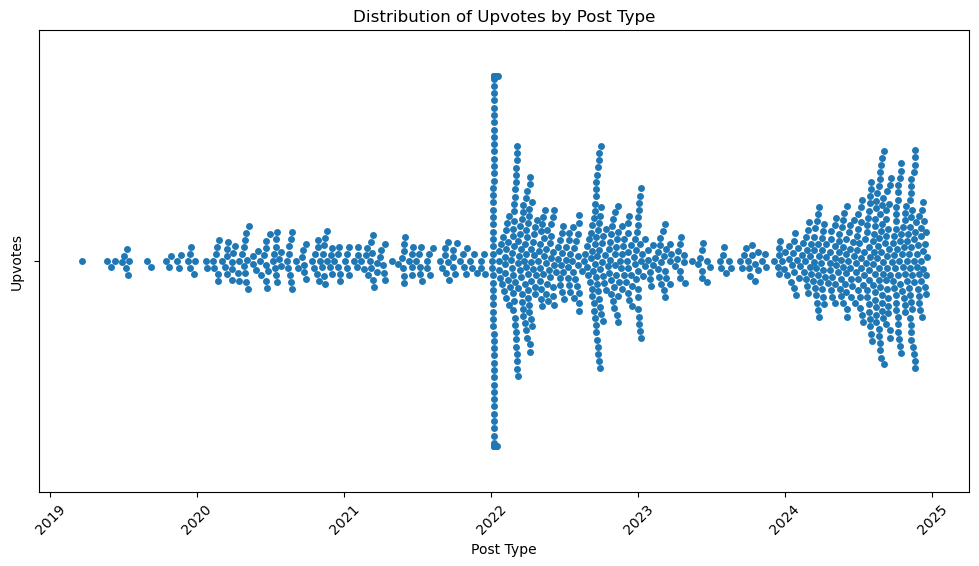

In [45]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x=df["Post Date"])
plt.title("Distribution of Upvotes by Post Type")
plt.xlabel("Post Type")
plt.ylabel("Upvotes")
plt.xticks(rotation=45)
plt.show()

In [47]:
df_2022 = df[df['Post Date'].dt.year == 2022]
df_2024 = df[df['Post Date'].dt.year == 2024]

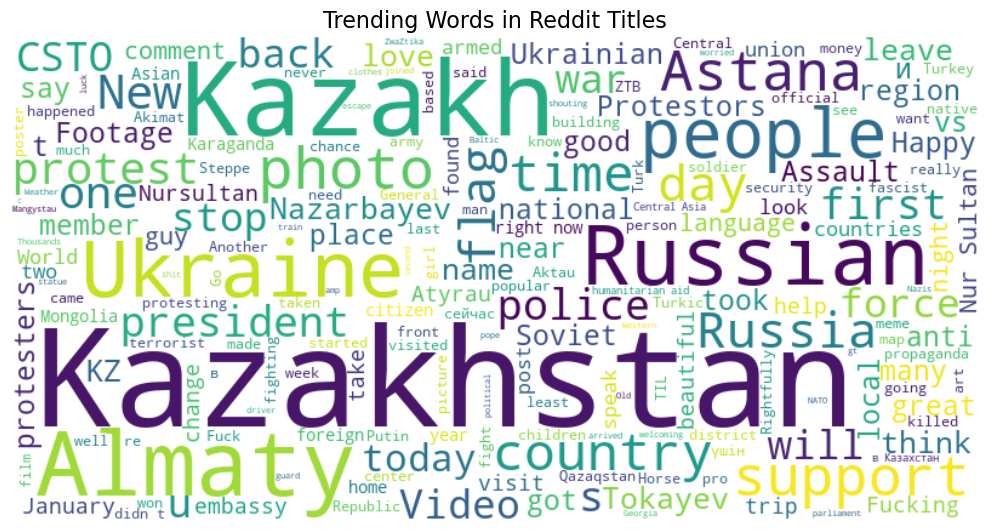

In [49]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df_2022['Title'].astype(str))  
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Words in Reddit Titles", fontsize=16)
plt.tight_layout()
plt.show()

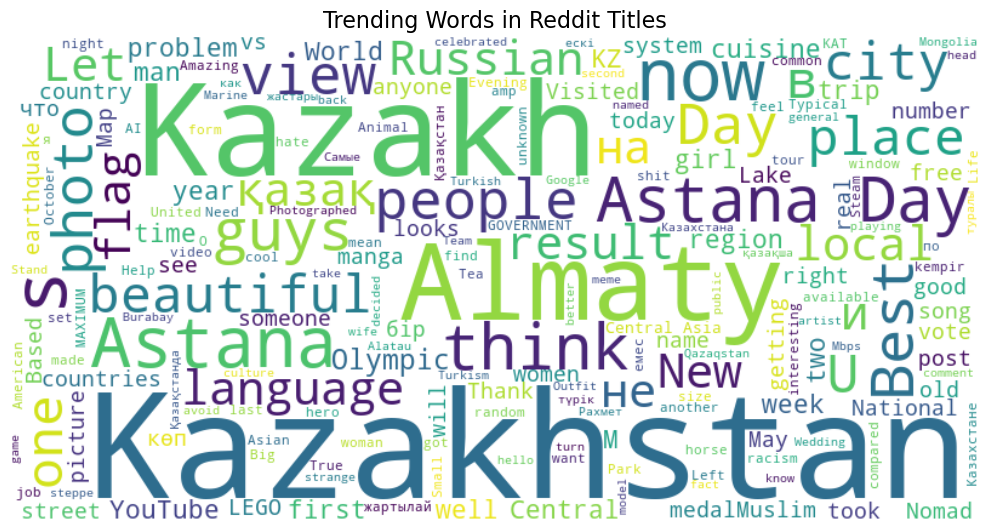

In [53]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df_2024['Title'].astype(str))  
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Words in Reddit Titles", fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
df_2024.to_csv('df2024',index=False)

  Post Type  Avg Upvotes  Total Upvotes  Post Count  Avg Comments  \
0     image   133.498221          75026         562     25.797153   
1      link   100.730769           5238          52     21.423077   
2      self   114.000000            798           7     60.000000   
3      text   126.115385          29511         234     51.662393   
4     video   164.455172          23846         145     27.924138   

   Total Comments  
0           14498  
1            1114  
2             420  
3           12089  
4            4049  


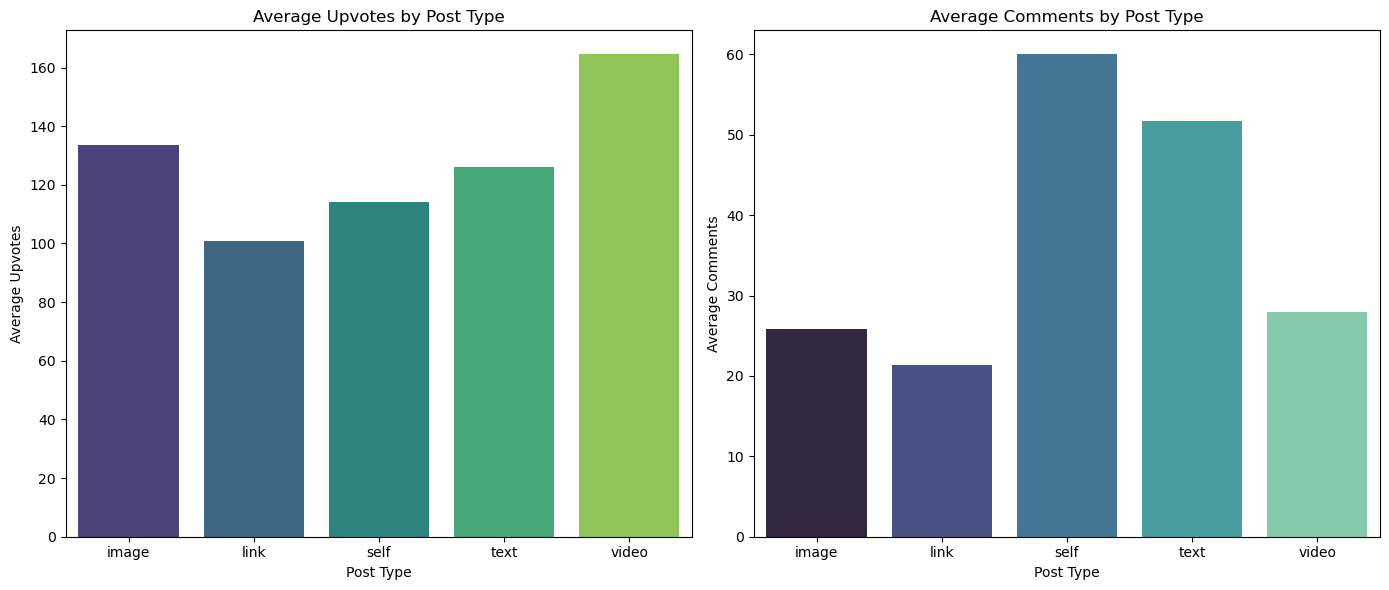

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df.groupby('Post Type').agg({
    'Upvotes': ['mean', 'sum', 'count'],  
    'Number of Comments': ['mean', 'sum']  
}).reset_index()
grouped.columns = ['Post Type', 'Avg Upvotes', 'Total Upvotes', 'Post Count', 'Avg Comments', 'Total Comments']
print(grouped)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
sns.barplot(x='Post Type', y='Avg Upvotes', data=grouped, palette='viridis', hue='Post Type')
plt.title('Average Upvotes by Post Type')
plt.ylabel('Average Upvotes')
plt.xlabel('Post Type')

plt.subplot(1, 2, 2)  
sns.barplot(x='Post Type', y='Avg Comments', data=grouped, palette='mako', hue='Post Type')
plt.title('Average Comments by Post Type')
plt.ylabel('Average Comments')
plt.xlabel('Post Type')
plt.tight_layout()
plt.show()

In [57]:
import matplotlib.pyplot as plt

df['Hour'] = df['Post Date'].dt.hour
df['Time Period'] = df['Hour'].apply(lambda x: 'Peak Hours' if (7 <= x <= 9) or (17 <= x <= 20) else 'Off-Peak Hours')

time_period_engagement = df.pivot_table(
    values=['Upvotes', 'Number of Comments'], 
    index='Time Period', 
    aggfunc='mean' 
)

time_period_engagement.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Engagement During Peak vs. Off-Peak Hours')
plt.ylabel('Average Engagement')
plt.xlabel('Time Period')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


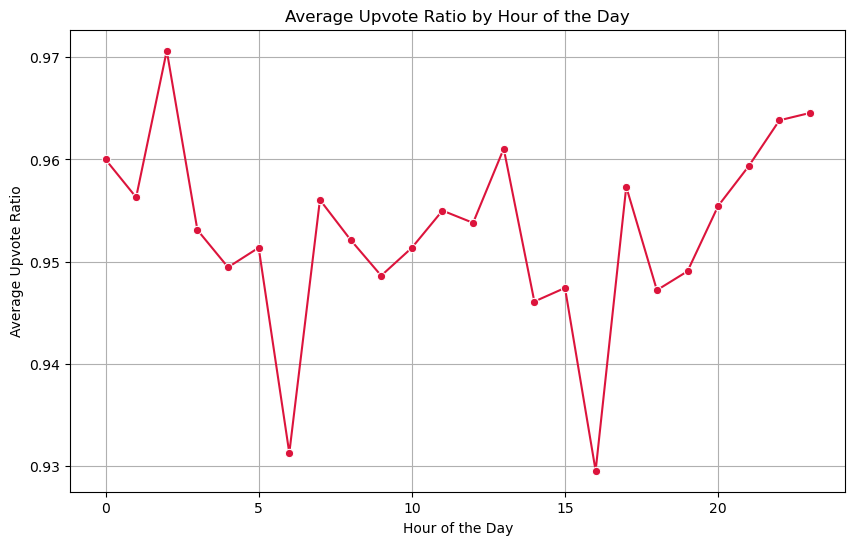

In [59]:
hourly_ratio = df.groupby('Hour').agg(
    Average_Upvote_Ratio=('Upvote Ratio', 'mean')
).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=hourly_ratio,
    x='Hour',
    y='Average_Upvote_Ratio',
    marker='o',
    color='crimson' 
)
plt.title('Average Upvote Ratio by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Upvote Ratio')
plt.grid(True)
plt.show()


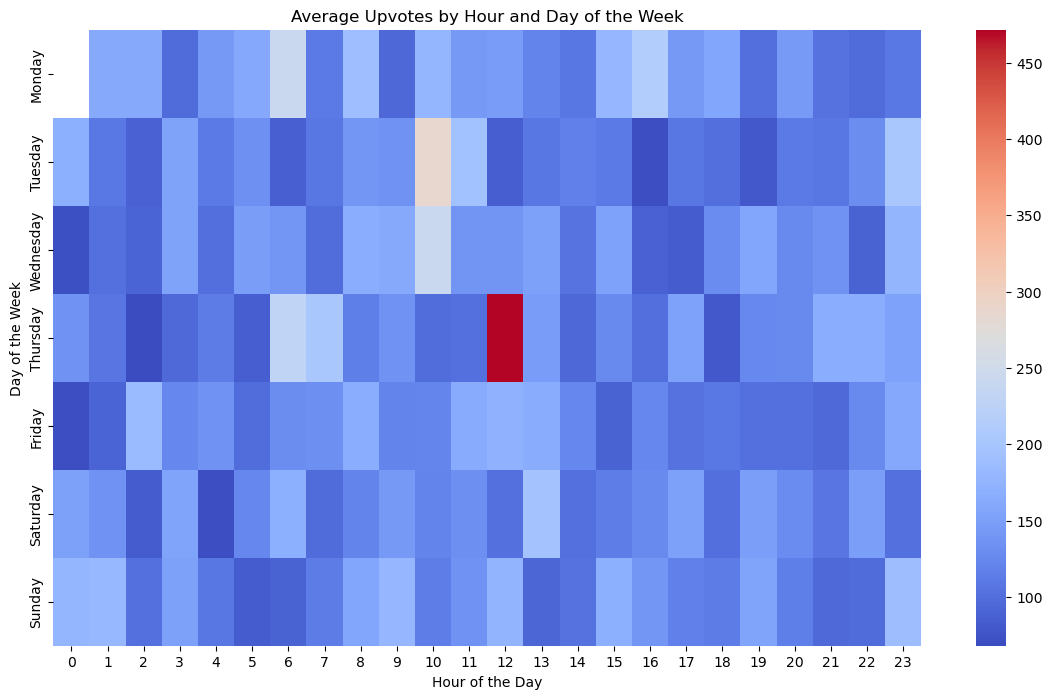

In [61]:
df['Day of Week'] = df['Post Date'].dt.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=days_order, ordered=True)

heatmap_data = df.pivot_table(index='Day of Week', columns='Hour', values='Upvotes', aggfunc='mean', observed=False)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Average Upvotes by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [63]:
filtered_df = df[df['Title'].str.contains(r'\bSherzat\b|\bШерзат\b', case=False, na=False)]
filtered_df

Title  Upvotes  \
397  Қоғамда Шерзат жайлы неге бір ауыз сөз айтпайды?      113   

     Number of Comments           Post Date Author Name  Post ID  Score  \
397                  36 2024-12-13 15:56:50     ziziksa  1hdfasg    113   

     Upvote Ratio  Over 18? Post Type  Post_Type_Encoded  Over 18 Encoded  \
397          0.85     False     video                  4                0   

     Post_Date_Numeric  Hour     Time Period Day of Week  
397         1734105410    15  Off-Peak Hours      Friday

In [73]:
import requests
import pandas as pd
import time
from datetime import datetime

client_id = "QqD49ndCju8CZWKz_KfPCA"
client_secret = "9L-XW49s_ckwqzogugzYcs9uirWW6g"
user_agent = "DataFetcher/1.0 by NeighborhoodSea7701"

auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
data = {
    'grant_type': 'password',
    'username': 'NeighborhoodSea7701',
    'password': 'Lolazz15000@'
}
headers = {'User-Agent': user_agent}
res = requests.post("https://www.reddit.com/api/v1/access_token", auth=auth, data=data, headers=headers)

if res.status_code == 200:
    token = res.json()["access_token"]
    headers["Authorization"] = f"bearer {token}"
    print("Access token obtained successfully.")
else:
    print(f"Failed to get access token: {res.status_code} {res.json()}")
    exit()
    
keywords = ["Шерзат", "Sherzat"]
url = f"https://oauth.reddit.com/search.json"
params = {
    "q": " OR ".join(keywords),
    "sort": "new",  
    "limit": 100,   
    "restrict_sr": False  
}

all_posts = []
after = None

for _ in range(10):  
    if after:
        params['after'] = after  
    
    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        posts_data = response.json()["data"]["children"]
        for post in posts_data:
            post_info = post["data"]
            post_data = {
                "Title": post_info.get("title"),
                "Upvotes": post_info.get("ups"),
                "Number of Comments": post_info.get("num_comments"),
                "Post Date": post_info.get("created_utc"),
                "Author Name": post_info.get("author"),
                "Post ID": post_info.get("id"),
                "Subreddit": post_info.get("subreddit"),
                "Score": post_info.get("score"),
                "Upvote Ratio": post_info.get("upvote_ratio"),
                "Over 18?": post_info.get("over_18"),
                "Post Hint": post_info.get("post_hint"),  
                "Is Video": post_info.get("is_video"),  
                "Text": post_info.get("selftext"),
            }
            all_posts.append(post_data)

        after = response.json()["data"].get("after", None)
        print(f"Fetched {len(posts_data)} posts...")

        if not after:  
            break
    else:
        print(f"Failed to fetch posts: {response.status_code} {response.json()}")
        break

    time.sleep(2)  

dfSh = pd.DataFrame(all_posts)
dfSh.to_csv("posts_Шерзат.csv", index=False)
print("Data saved to posts_Шерзат.csv")

Access token obtained successfully.
Fetched 9 posts...
Data saved to posts_Шерзат.csv


In [1]:
import pandas as pd
import numpy as np
dfSh = pd.read_csv('posts_Шерзат.csv')

In [3]:
dfSh = dfSh.rename(columns={'Post Hint': 'Post Type'})

In [5]:
dfSh['Post Type'] = dfSh['Post Type'].fillna('text')
dfSh

Title  Upvotes  \
0   Қоғамда Шерзат жайлы неге бір ауыз сөз айтпайды?      113   
1  killed a teenager in Almaty and destroyed the ...        1   
2  Астанада Мәңгілік Ел мен Қонаева қиылысында «Ш...       56   
3                  Tokayev destroys Sherzat's family        1   
4  Екі ай бұрын өлтірілген 16 жасар Шерзат Болатт...       56   
5  Шерзат Полаттың ағасы Нұрғанат Ғайыпбаев өлтір...       10   
6  Талғарда 16 жастағы одан бұрын бір сыра үшін ө...       36   
7  Талғардағы қайғылы оқиға: марқұм Шерзат Болатт...       15   
8                        16 y/o killed in Kazakhstan      155   

   Number of Comments     Post Date         Author Name  Post ID    Subreddit  \
0                  36  1.734105e+09             ziziksa  1hdfasg   Kazakhstan   
1                   0  1.734023e+09           Ademidoni  1hcpiuc  u_Ademidoni   
2                   7  1.734022e+09            Tanir_99  1hcpgi0   Kazakhstan   
3                   0  1.733915e+09             osqolki  1hbr517      osqolki   
4                  13  1.733901e+09            Tanir_99  1hbo1e5   Kazakhstan   
5                   2  1.733777e+09            Tanir_99  1haju44   Kazakhstan   
6                   8  1.728766e+09            Tanir_99  1g29i5d   Kazakhstan   
7                   2  1.728720e+09            Tanir_99  1g1vat6   Kazakhstan   
8                  36  1.728199e+09  BubblyCampaign2610  1fxayz3   Kazakhstan   

   Score  Upvote Ratio  Over 18?     Post Type  Is Video  \
0    113          0.85     False  hosted:video      True   
1      1          1.00     False          text     False   
2     56          0.92     False         image     False   
3      1          1.00     False          text     False   
4     56          0.90     False         image     False   
5     10          0.86     False  hosted:video      True   
6     36          0.94     False  hosted:video      True   
7     15          0.90     False          link     False   
8    155          0.96     False          text     False   

                                                Text  
0  Әлеуметтік желілерде Украина бауырларымызға кө...  
1  He was killed in front of his mother because o...  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                NaN  
7                                                NaN  
8  The creepy video was filmed by residents of on...

In [75]:
dfSh.head()

Title  Upvotes  \
0   Қоғамда Шерзат жайлы неге бір ауыз сөз айтпайды?      113   
1  killed a teenager in Almaty and destroyed the ...        1   
2  Астанада Мәңгілік Ел мен Қонаева қиылысында «Ш...       56   
3                  Tokayev destroys Sherzat's family        1   
4  Екі ай бұрын өлтірілген 16 жасар Шерзат Болатт...       56   

   Number of Comments     Post Date Author Name  Post ID    Subreddit  Score  \
0                  36  1.734105e+09     ziziksa  1hdfasg   Kazakhstan    113   
1                   0  1.734023e+09   Ademidoni  1hcpiuc  u_Ademidoni      1   
2                   7  1.734022e+09    Tanir_99  1hcpgi0   Kazakhstan     56   
3                   0  1.733915e+09     osqolki  1hbr517      osqolki      1   
4                  13  1.733901e+09    Tanir_99  1hbo1e5   Kazakhstan     56   

   Upvote Ratio  Over 18?     Post Hint  Is Video  \
0          0.85     False  hosted:video      True   
1          1.00     False          None     False   
2          0.92     False         image     False   
3          1.00     False          None     False   
4          0.90     False         image     False   

                                                Text  
0  Әлеуметтік желілерде Украина бауырларымызға кө...  
1  He was killed in front of his mother because o...  
2                                                     
3                                                     
4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(dfSh['Post Type'])
plt.show()

In [9]:
import requests
import time

client_id = "_1Rz699mC_WtItnyD4HVWw"
client_secret = "Tgi0JdTZF_D0hgqvspSEc3pUivceeQ"
user_agent = "DataFetcher/1.0 by GoodSpeed4432"

auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
data = {
    'grant_type': 'password',
    'username': 'GoodSpeed4432',  
    'password': 'Lolazz15000@' 
}
headers = {'User-Agent': user_agent}

res = requests.post("https://www.reddit.com/api/v1/access_token", auth=auth, data=data, headers=headers)
if res.status_code == 200:
    token = res.json()["access_token"]
    headers["Authorization"] = f"bearer {token}"
    print("Access token obtained successfully.")
else:
    raise Exception(f"Failed to get access token: {res.status_code} {res.json()}")



Access token obtained successfully.


In [11]:
post_id = "1hdfasg"  
url = f"https://oauth.reddit.com/comments/{post_id}.json"

response = requests.get(url, headers=headers)

if response.status_code == 200:
    comments_data = response.json()
    all_comments = []

    for comment in comments_data[1]['data']['children']:
        if 'body' in comment['data']:  
            all_comments.append({
                "Author": comment['data'].get('author'),
                "Comment": comment['data'].get('body'),
                "Upvotes": comment['data'].get('ups'),
                "Comment Date": comment['data'].get('created_utc')
            })
else:
    raise Exception(f"Failed to fetch comments: {response.status_code} {response.json()}")

comments_df = pd.DataFrame(all_comments)
comments_df['Comment Date'] = pd.to_datetime(comments_df['Comment Date'], unit='s')  
comments_df.tail()

Author                                            Comment  \
8              merlina06          It's really hard for me to watch all this   
9   Southern_Necessary77                                    Что происходит?   
10         altaymountian  Неге бәрі ағылшынша жазып жатыр қазақша сұрақ ...   
11               sss_mut  өйткені көп сөз болып кетеді. Шерзаттың әкесін...   
12            Arstanishe           what are you, Abai with his black words?   

    Upvotes        Comment Date  
8         1 2024-12-15 19:46:07  
9         1 2024-12-16 05:13:48  
10        1 2024-12-16 13:09:47  
11       -2 2024-12-14 04:22:30  
12      -16 2024-12-13 16:24:19

In [13]:
post_id = "1hbo1e5"  
url = f"https://oauth.reddit.com/comments/{post_id}.json"

response = requests.get(url, headers=headers)

if response.status_code == 200:
    comments_data = response.json()
    all_comments = []

    for comment in comments_data[1]['data']['children']:
        if 'body' in comment['data']:  
            all_comments.append({
                "Author": comment['data'].get('author'),
                "Comment": comment['data'].get('body'),
                "Upvotes": comment['data'].get('ups'),
                "Comment Date": comment['data'].get('created_utc')
            })
else:
    raise Exception(f"Failed to fetch comments: {response.status_code} {response.json()}")

comments_df1 = pd.DataFrame(all_comments)
comments_df1['Comment Date'] = pd.to_datetime(comments_df['Comment Date'], unit='s')  
comments_df1.tail()

Author                                            Comment  Upvotes  \
2         ziziksa  https://preview.redd.it/i7pe54m4ke6e1.jpeg?wid...        5   
3     dostelibaev                                     bro’s profile💀        5   
4  MastersTime126                        Bruuh I can't see any logic        4   
5     Panteram_go                                          Wtf why?!        3   
6          ZhakeG  Походу дело будут ему шить либо заставят отказ...        1   

         Comment Date  
2 2024-12-13 18:06:51  
3 2024-12-14 08:12:57  
4 2024-12-13 21:34:36  
5 2024-12-14 03:57:57  
6 2024-12-13 18:57:21

In [15]:
post_id = "1hcpgi0"  
url = f"https://oauth.reddit.com/comments/{post_id}.json"

response = requests.get(url, headers=headers)

if response.status_code == 200:
    comments_data = response.json()
    all_comments = []

    for comment in comments_data[1]['data']['children']:
        if 'body' in comment['data']:  
            all_comments.append({
                "Author": comment['data'].get('author'),
                "Comment": comment['data'].get('body'),
                "Upvotes": comment['data'].get('ups'),
                "Comment Date": comment['data'].get('created_utc')
            })
else:
    raise Exception(f"Failed to fetch comments: {response.status_code} {response.json()}")

comments_df2 = pd.DataFrame(all_comments)
comments_df2['Comment Date'] = pd.to_datetime(comments_df['Comment Date'], unit='s')  

In [17]:
post_id = "1g29i5d"  
url = f"https://oauth.reddit.com/comments/{post_id}.json"

response = requests.get(url, headers=headers)

if response.status_code == 200:
    comments_data = response.json()
    all_comments = []

    for comment in comments_data[1]['data']['children']:
        if 'body' in comment['data']:  
            all_comments.append({
                "Author": comment['data'].get('author'),
                "Comment": comment['data'].get('body'),
                "Upvotes": comment['data'].get('ups'),
                "Comment Date": comment['data'].get('created_utc')
            })
else:
    raise Exception(f"Failed to fetch comments: {response.status_code} {response.json()}")

comments_df3 = pd.DataFrame(all_comments)
comments_df3['Comment Date'] = pd.to_datetime(comments_df['Comment Date'], unit='s')  

In [19]:
post_id = "1fxayz3"  
url = f"https://oauth.reddit.com/comments/{post_id}.json"

response = requests.get(url, headers=headers)

if response.status_code == 200:
    comments_data = response.json()
    all_comments = []

    for comment in comments_data[1]['data']['children']:
        if 'body' in comment['data']:  
            all_comments.append({
                "Author": comment['data'].get('author'),
                "Comment": comment['data'].get('body'),
                "Upvotes": comment['data'].get('ups'),
                "Comment Date": comment['data'].get('created_utc')
            })
else:
    raise Exception(f"Failed to fetch comments: {response.status_code} {response.json()}")

comments_df4 = pd.DataFrame(all_comments)
comments_df4['Comment Date'] = pd.to_datetime(comments_df['Comment Date'], unit='s')  

In [21]:
con_df1 = pd.concat([comments_df, comments_df1])
con_df1

Author                                            Comment  \
0               msmysery  sorry, i do not usually read the news, what is...   
1       Agitated-Pea3251  I also was saddened by this tragedy. And sligh...   
2               miraska_  There is a trend in kazakh speaking tiktok to ...   
3          abrakadabrana  My heart burning seeing how life a boy who is ...   
4            ScarecrowKZ                  what a shitty world we live in :D   
5     Asian_Jesus_Christ  The only way is to riot actively or passively ...   
6               MouMerKZ       Our country was corrupted from the beginning   
7              tranzidor  Justice is only for rich people in our country...   
8              merlina06          It's really hard for me to watch all this   
9   Southern_Necessary77                                    Что происходит?   
10         altaymountian  Неге бәрі ағылшынша жазып жатыр қазақша сұрақ ...   
11               sss_mut  өйткені көп сөз болып кетеді. Шерзаттың әкесін...   
12            Arstanishe           what are you, Abai with his black words?   
0               miraska_  Jeez, this family suffered a lot. They can onl...   
1            dostelibaev  қателеспесем әкесі өз-өзіне қол жұмсамақ болға...   
2                ziziksa  https://preview.redd.it/i7pe54m4ke6e1.jpeg?wid...   
3            dostelibaev                                     bro’s profile💀   
4         MastersTime126                        Bruuh I can't see any logic   
5            Panteram_go                                          Wtf why?!   
6                 ZhakeG  Походу дело будут ему шить либо заставят отказ...   

    Upvotes        Comment Date  
0        15 2024-12-13 16:40:54  
1        14 2024-12-13 18:28:20  
2        20 2024-12-13 18:06:51  
3         5 2024-12-14 08:12:57  
4         3 2024-12-13 21:34:36  
5         4 2024-12-14 03:57:57  
6         8 2024-12-13 18:57:21  
7         4 2024-12-13 20:50:58  
8         1 2024-12-15 19:46:07  
9         1 2024-12-16 05:13:48  
10        1 2024-12-16 13:09:47  
11       -2 2024-12-14 04:22:30  
12      -16 2024-12-13 16:24:19  
0        14 2024-12-13 16:40:54  
1         9 2024-12-13 18:28:20  
2         5 2024-12-13 18:06:51  
3         5 2024-12-14 08:12:57  
4         4 2024-12-13 21:34:36  
5         3 2024-12-14 03:57:57  
6         1 2024-12-13 18:57:21

In [23]:
con_df2=pd.concat([con_df1, comments_df2])
con_df2

Author                                            Comment  \
0               msmysery  sorry, i do not usually read the news, what is...   
1       Agitated-Pea3251  I also was saddened by this tragedy. And sligh...   
2               miraska_  There is a trend in kazakh speaking tiktok to ...   
3          abrakadabrana  My heart burning seeing how life a boy who is ...   
4            ScarecrowKZ                  what a shitty world we live in :D   
5     Asian_Jesus_Christ  The only way is to riot actively or passively ...   
6               MouMerKZ       Our country was corrupted from the beginning   
7              tranzidor  Justice is only for rich people in our country...   
8              merlina06          It's really hard for me to watch all this   
9   Southern_Necessary77                                    Что происходит?   
10         altaymountian  Неге бәрі ағылшынша жазып жатыр қазақша сұрақ ...   
11               sss_mut  өйткені көп сөз болып кетеді. Шерзаттың әкесін...   
12            Arstanishe           what are you, Abai with his black words?   
0               miraska_  Jeez, this family suffered a lot. They can onl...   
1            dostelibaev  қателеспесем әкесі өз-өзіне қол жұмсамақ болға...   
2                ziziksa  https://preview.redd.it/i7pe54m4ke6e1.jpeg?wid...   
3            dostelibaev                                     bro’s profile💀   
4         MastersTime126                        Bruuh I can't see any logic   
5            Panteram_go                                          Wtf why?!   
6                 ZhakeG  Походу дело будут ему шить либо заставят отказ...   
0         MastersTime126                                  What does he mean   
1      IndomitableSp1rit  біреуде осындай эксперимент бар еді ғой? бір е...   
2               ai_ririn                                                  👏   
3                sss_mut  ну зачем так делать? он его не знает, только и...   

    Upvotes        Comment Date  
0        15 2024-12-13 16:40:54  
1        14 2024-12-13 18:28:20  
2        20 2024-12-13 18:06:51  
3         5 2024-12-14 08:12:57  
4         3 2024-12-13 21:34:36  
5         4 2024-12-14 03:57:57  
6         8 2024-12-13 18:57:21  
7         4 2024-12-13 20:50:58  
8         1 2024-12-15 19:46:07  
9         1 2024-12-16 05:13:48  
10        1 2024-12-16 13:09:47  
11       -2 2024-12-14 04:22:30  
12      -16 2024-12-13 16:24:19  
0        14 2024-12-13 16:40:54  
1         9 2024-12-13 18:28:20  
2         5 2024-12-13 18:06:51  
3         5 2024-12-14 08:12:57  
4         4 2024-12-13 21:34:36  
5         3 2024-12-14 03:57:57  
6         1 2024-12-13 18:57:21  
0         4 2024-12-13 16:40:54  
1         6 2024-12-13 18:28:20  
2         2 2024-12-13 18:06:51  
3        -3 2024-12-14 08:12:57

In [25]:
con_df3=pd.concat([con_df2, comments_df4])
con_df3

Author                                            Comment  \
0               msmysery  sorry, i do not usually read the news, what is...   
1       Agitated-Pea3251  I also was saddened by this tragedy. And sligh...   
2               miraska_  There is a trend in kazakh speaking tiktok to ...   
3          abrakadabrana  My heart burning seeing how life a boy who is ...   
4            ScarecrowKZ                  what a shitty world we live in :D   
5     Asian_Jesus_Christ  The only way is to riot actively or passively ...   
6               MouMerKZ       Our country was corrupted from the beginning   
7              tranzidor  Justice is only for rich people in our country...   
8              merlina06          It's really hard for me to watch all this   
9   Southern_Necessary77                                    Что происходит?   
10         altaymountian  Неге бәрі ағылшынша жазып жатыр қазақша сұрақ ...   
11               sss_mut  өйткені көп сөз болып кетеді. Шерзаттың әкесін...   
12            Arstanishe           what are you, Abai with his black words?   
0               miraska_  Jeez, this family suffered a lot. They can onl...   
1            dostelibaev  қателеспесем әкесі өз-өзіне қол жұмсамақ болға...   
2                ziziksa  https://preview.redd.it/i7pe54m4ke6e1.jpeg?wid...   
3            dostelibaev                                     bro’s profile💀   
4         MastersTime126                        Bruuh I can't see any logic   
5            Panteram_go                                          Wtf why?!   
6                 ZhakeG  Походу дело будут ему шить либо заставят отказ...   
0         MastersTime126                                  What does he mean   
1      IndomitableSp1rit  біреуде осындай эксперимент бар еді ғой? бір е...   
2               ai_ririn                                                  👏   
3                sss_mut  ну зачем так делать? он его не знает, только и...   
0          SeymourHughes  Share some source to this news, please. Otherw...   
1   Disastrous_Narwhal46  This is absolutely tragic and horrifying. All ...   
2                Yuuuigt  I’m sick of this shit. How do these morons jus...   
3            Globus_CSGO  All that for a can of beer… failed state at ev...   
4              [deleted]                                          [deleted]   
5              enstrONGO                     why is it always the South man   
6      21stcenturynomadd                Toss them for life. Make an example   
7                 snupir  In 2024 year these things still happen , that’...   
8     Specialist-Cod5869   I work like 3 min from this place, that’s creepy   
9   Appropriate_Month111  Average talgar residents... I was told many ti...   
10        pre_industrial                                     So sad to read   
11        AmbitionOk4872                        They're gonna be free soon.   
12   Mindless-Estate3275  Murder should be punished by as much torture a...   
13      LiminalBuccaneer  We'll be seeing more and more of that in the c...   
14            fitosintez                They will become roosters in prison   
15          Dametequitos             did you use google translate for this?   
16          decadentview  What !! Wow uhm seeking revenge since knowing ...   
17  Apprehensive-Ad-6053   Neanderthals. This country is in steady decline.   
18        MastersTime126   This story is really horrible. It's pitiful t...   
19             [deleted]                                          [removed]   
20   No-Description-3242                                   Куда мы катимся    
21           stalino2023  Really crazy story, like it's the 90s all over...   

    Upvotes        Comment Date  
0        15 2024-12-13 16:40:54  
1        14 2024-12-13 18:28:20  
2        20 2024-12-13 18:06:51  
3         5 2024-12-14 08:12:57  
4         3 2024-12-13 21:34:36  
5         4 2024-12-14 03:57:57  
6         8 2024-12-13 18:57:21  
7         4 2024-12-13 20:50:58 

In [27]:
con_df4 = pd.concat([con_df3, comments_df3])
con_df4


Author                                            Comment  \
0               msmysery  sorry, i do not usually read the news, what is...   
1       Agitated-Pea3251  I also was saddened by this tragedy. And sligh...   
2               miraska_  There is a trend in kazakh speaking tiktok to ...   
3          abrakadabrana  My heart burning seeing how life a boy who is ...   
4            ScarecrowKZ                  what a shitty world we live in :D   
5     Asian_Jesus_Christ  The only way is to riot actively or passively ...   
6               MouMerKZ       Our country was corrupted from the beginning   
7              tranzidor  Justice is only for rich people in our country...   
8              merlina06          It's really hard for me to watch all this   
9   Southern_Necessary77                                    Что происходит?   
10         altaymountian  Неге бәрі ағылшынша жазып жатыр қазақша сұрақ ...   
11               sss_mut  өйткені көп сөз болып кетеді. Шерзаттың әкесін...   
12            Arstanishe           what are you, Abai with his black words?   
0               miraska_  Jeez, this family suffered a lot. They can onl...   
1            dostelibaev  қателеспесем әкесі өз-өзіне қол жұмсамақ болға...   
2                ziziksa  https://preview.redd.it/i7pe54m4ke6e1.jpeg?wid...   
3            dostelibaev                                     bro’s profile💀   
4         MastersTime126                        Bruuh I can't see any logic   
5            Panteram_go                                          Wtf why?!   
6                 ZhakeG  Походу дело будут ему шить либо заставят отказ...   
0         MastersTime126                                  What does he mean   
1      IndomitableSp1rit  біреуде осындай эксперимент бар еді ғой? бір е...   
2               ai_ririn                                                  👏   
3                sss_mut  ну зачем так делать? он его не знает, только и...   
0          SeymourHughes  Share some source to this news, please. Otherw...   
1   Disastrous_Narwhal46  This is absolutely tragic and horrifying. All ...   
2                Yuuuigt  I’m sick of this shit. How do these morons jus...   
3            Globus_CSGO  All that for a can of beer… failed state at ev...   
4              [deleted]                                          [deleted]   
5              enstrONGO                     why is it always the South man   
6      21stcenturynomadd                Toss them for life. Make an example   
7                 snupir  In 2024 year these things still happen , that’...   
8     Specialist-Cod5869   I work like 3 min from this place, that’s creepy   
9   Appropriate_Month111  Average talgar residents... I was told many ti...   
10        pre_industrial                                     So sad to read   
11        AmbitionOk4872                        They're gonna be free soon.   
12   Mindless-Estate3275  Murder should be punished by as much torture a...   
13      LiminalBuccaneer  We'll be seeing more and more of that in the c...   
14            fitosintez                They will become roosters in prison   
15          Dametequitos             did you use google translate for this?   
16          decadentview  What !! Wow uhm seeking revenge since knowing ...   
17  Apprehensive-Ad-6053   Neanderthals. This country is in steady decline.   
18        MastersTime126   This story is really horrible. It's pitiful t...   
19             [deleted]                                          [removed]   
20   No-Description-3242                                   Куда мы катимся    
21           stalino2023  Really crazy story, like it's the 90s all over...   
0             DotDry1921  пздц 90шы жылдарда қалып қалған хайуандар, ада...   
1         FreakingFreaks  Can anyone give his kaspi card number? Does he...   
2         FreakingFreaks  пиздец жана Казахстан. Войны нет, а беспредел ...   
3                 qwezrX                      Have they found the cu

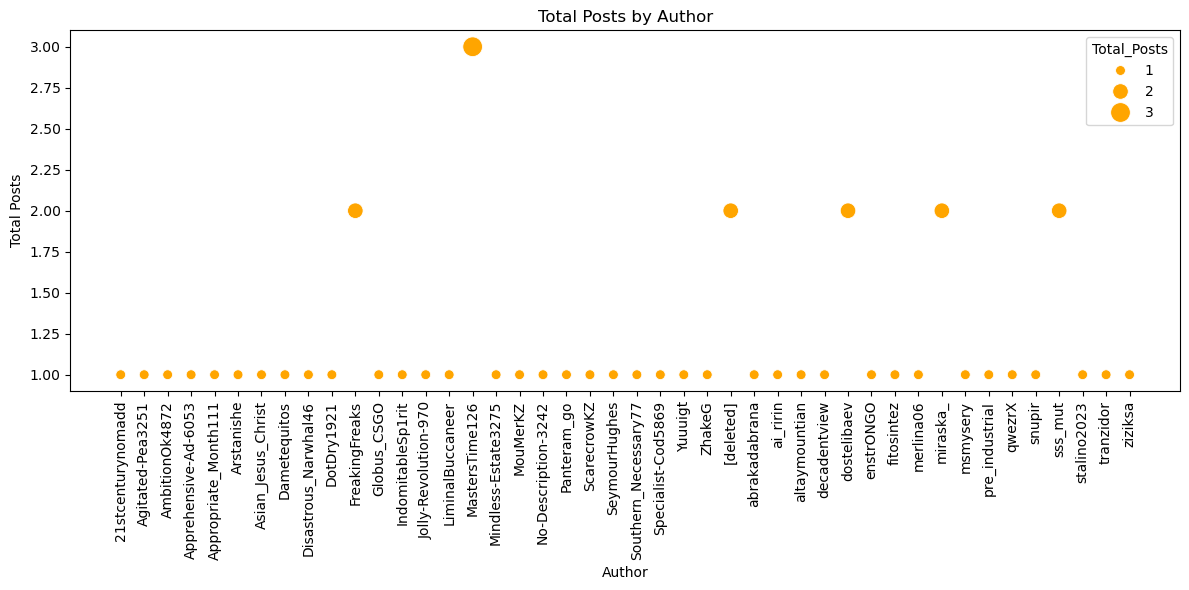

In [29]:
author_upvotes = con_df4.groupby('Author').agg(
    Total_Posts=('Author', 'size')
).reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=author_upvotes,x='Author',  y='Total_Posts', size='Total_Posts',  sizes=(50, 200), color='orange'  )
plt.title('Total Posts by Author')
plt.xlabel('Author')
plt.ylabel('Total Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [97]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = [word for word in stop_words if word != 'not']
stop_rus = stopwords.words('russian')
stop_rus = [word for word in stop_words if word != 'не']
stop_Kaz = stopwords.words('kazakh')
stop_Kaz = [word for word in stop_words if word != 'емес']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zarkynajkabdekenova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
from textblob import TextBlob

con_df4['Sentiment'] = con_df4['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

def categorize_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

con_df4['Sentiment Category'] = con_df4['Sentiment'].apply(categorize_sentiment)

print(con_df4['Sentiment Category'].value_counts())


Sentiment Category
Neutral     25
Negative    18
Positive     8
Name: count, dtype: int64


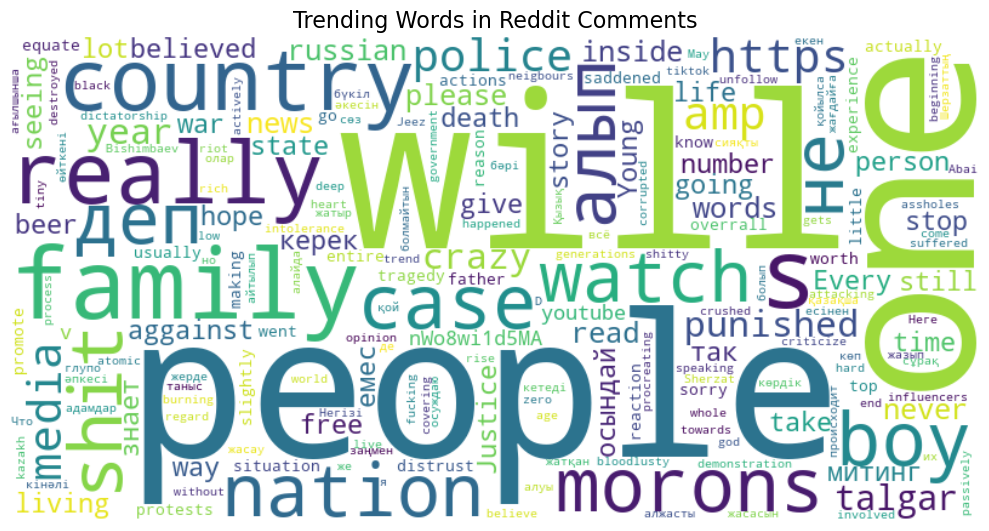

In [107]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_titles = " ".join(con_df4['Comment'].dropna().astype(str))
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate(all_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Words in Reddit Comments", fontsize=16)
plt.tight_layout()
plt.show()

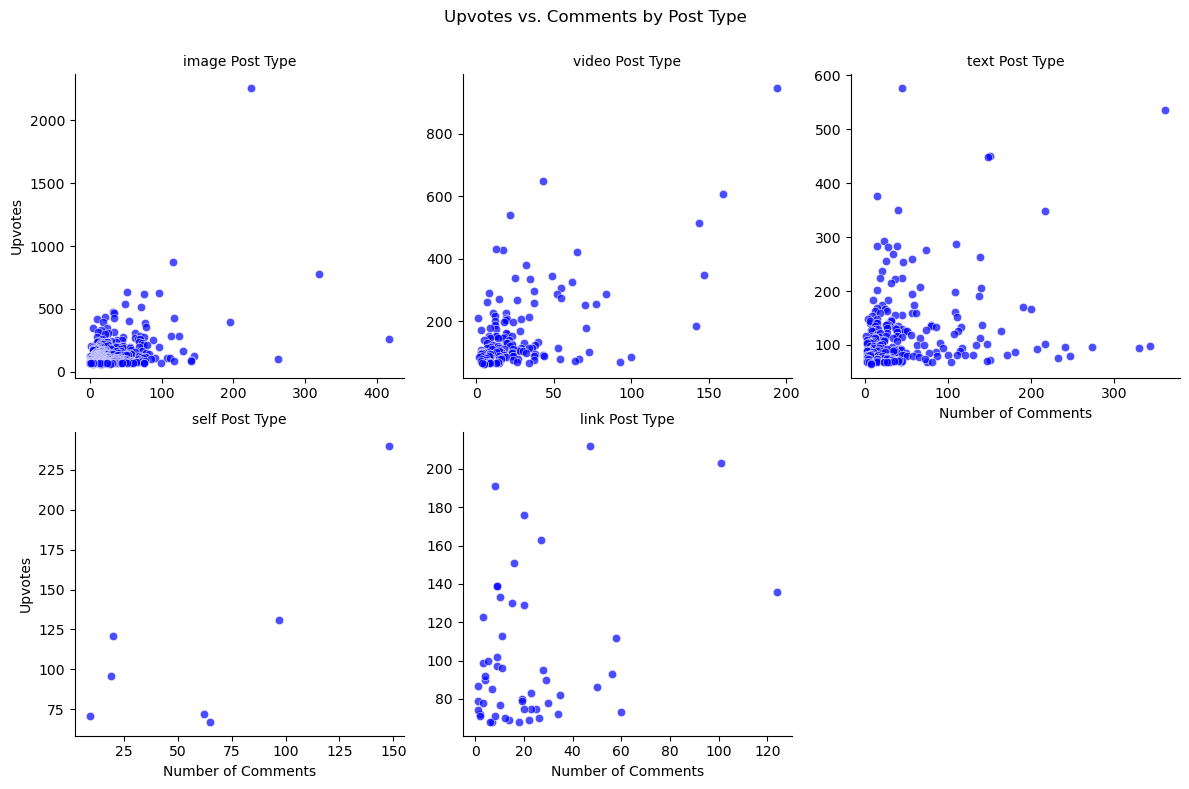

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet Grid: Scatter of Upvotes vs. Comments by Post Type
g = sns.FacetGrid(df, col="Post Type", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, "Number of Comments", "Upvotes", alpha=0.7, color="blue")
g.set_titles("{col_name} Post Type")
g.set_axis_labels("Number of Comments", "Upvotes")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Upvotes vs. Comments by Post Type")
plt.show()

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import patsy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df['Post Type Encoded'] = df['Post Type'].astype('category').cat.codes
df['Over 18 Encoded'] = df['Over 18?'].astype('category').cat.codes
df['Post Date Numeric'] = pd.to_datetime(df['Post Date']).astype('int64') // 10**9

features = ['Post Type Encoded', 'Upvote Ratio', 'Number of Comments','Post Date Numeric']
target = 'Upvotes'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


formula = 'Upvotes ~ Post_Type_Encoded + Q("Upvote Ratio") + Q("Number of Comments") + Post_Date_Numeric'
y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")

ols_model = sm.OLS(y, sm.add_constant(X))  
ols_results = ols_model.fit()
print(ols_results.summary())

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model - Mean Absolute Error: {mae}")
print(f"Random Forest Model - Mean Squared Error: {mse}")
print(f"Random Forest Model - R-squared: {r2}")

importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                            OLS Regression Results                            
Dep. Variable:                Upvotes   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     62.84
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           2.18e-47
Time:                        09:50:40   Log-Likelihood:                -6050.3
No. Observations:                1000   AIC:                         1.211e+04
Df Residuals:                     995   BIC:                         1.214e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import patsy
import statsmodels.api as sm

df['Post Type Encoded'] = df['Post Type'].astype('category').cat.codes
df['Over 18 Encoded'] = df['Over 18?'].astype('category').cat.codes
df['Post Date Numeric'] = pd.to_datetime(df['Post Date']).astype('int64') // 10**9

features = ['Post Type Encoded', 'Upvote Ratio', 'Number of Comments', 'Post Date Numeric']
target = 'Upvotes'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

formula = 'Upvotes ~ Q("Post Type Encoded") + Q("Upvote Ratio") + Q("Number of Comments") + Q("Post Date Numeric")'
y_train_patsy, X_train_patsy = patsy.dmatrices(formula, data=df.loc[X_train.index], return_type="dataframe")
y_test_patsy, X_test_patsy = patsy.dmatrices(formula, data=df.loc[X_test.index], return_type="dataframe")

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X)) 
    y = y.reshape(-1, 1)  

    theta = np.zeros((n + 1, 1))  
    history = []

    for i in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient

        mse = (1 / (2 * m)) * np.sum(errors**2)
        history.append(mse)

        if i % 100 == 0:
            print(f"Iteration {i}: MSE = {mse}")

    return theta, history
X_train_np = X_train_patsy.to_numpy()
y_train_np = y_train_patsy.to_numpy()

learning_rate = 0.01
iterations = 1000
theta, history = gradient_descent(X_train_np, y_train_np, learning_rate, iterations)

# Evaluate the model on the test set
m_test, n_test = X_test_patsy.shape
X_test_np = np.hstack((np.ones((m_test, 1)), X_test_patsy.to_numpy()))
predictions = np.dot(X_test_np, theta).flatten()

mae = mean_absolute_error(y_test_patsy, predictions)
mse = mean_squared_error(y_test_patsy, predictions)
r2 = r2_score(y_test_patsy, predictions)

print(f"Gradient Descent Linear Regression - Mean Absolute Error: {mae}")
print(f"Gradient Descent Linear Regression - Mean Squared Error: {mse}")
print(f"Gradient Descent Linear Regression - R-squared: {r2}")

Iteration 0: MSE = 41875.0
Iteration 100: MSE = nan
Iteration 200: MSE = nan
Iteration 300: MSE = nan
Iteration 400: MSE = nan
Iteration 500: MSE = nan
Iteration 600: MSE = nan
Iteration 700: MSE = nan
Iteration 800: MSE = nan
Iteration 900: MSE = nan


/var/folders/nr/tv7hrp615zn6tmz655hz3yp40000gn/T/ipykernel_70493/3022205448.py:45: RuntimeWarning: overflow encountered in square
  mse = (1 / (2 * m)) * np.sum(errors**2)
/var/folders/nr/tv7hrp615zn6tmz655hz3yp40000gn/T/ipykernel_70493/3022205448.py:43: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


ValueError: Input contains NaN.

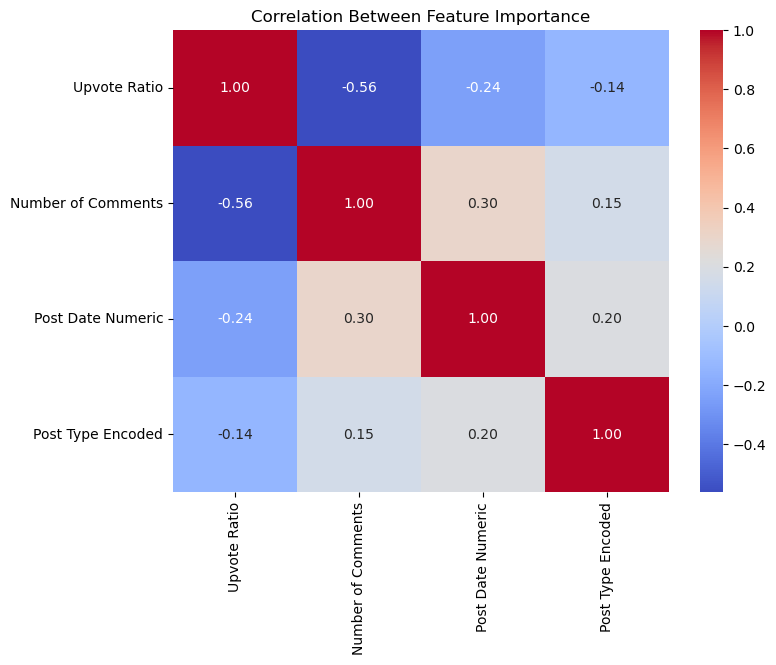

In [71]:
import numpy as np

corr = df[['Upvote Ratio', 'Number of Comments', 'Post Date Numeric', 'Post Type Encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Feature Importance")
plt.show()

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Over 18 Encoded')
plt.show()